In [1]:
%matplotlib inline

In [105]:
import os
import pandas as pd
import calplot
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))

In [32]:
df = pd.read_csv(os.path.join('data', 'my_garmin_data.tsv'), sep='\t', parse_dates=['date'])

In [44]:
df['steps_k_cnt'] = df.apply(lambda row: round(row['steps_cnt'] / 1000), axis=1)

In [88]:
def steps_grouped(steps_cnt):
    if steps_cnt <= 5000:
        return 1
    if steps_cnt <= 10000:
        return 2
    return 3

df['steps_cnt_grouped'] = df.apply(lambda row: steps_grouped(row['steps_cnt']), axis=1)

In [94]:
df['year'] = df.apply(lambda row: row['date'].year, axis=1)

In [95]:
df

,date,steps_cnt,min_hr,min_avg_hr,max_avg_hr,max_hr,resting_hr,sleep_start,sleep_end,steps_k_cnt,steps_cnt_grouped,year
0,2018-10-20,4427,45,47,121,132,45,2018-10-19 20:00:00,2018-10-20 03:00:00,4,1,2018
1,2018-10-21,7579,54,55,113,120,54,2018-10-20 20:24:00,2018-10-21 04:54:00,8,2,2018
2,2018-10-22,8615,45,48,121,133,56,2018-10-21 20:22:00,2018-10-22 05:16:00,9,2,2018
3,2018-10-23,5702,50,51,124,136,55,2018-10-22 22:35:00,2018-10-23 06:05:00,6,2,2018
4,2018-10-24,6783,45,46,117,124,55,2018-10-23 20:57:00,2018-10-24 04:52:00,7,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
1279,2022-04-21,4591,47,49,106,106,55,2022-04-21 03:40:00,2022-04-21 10:45:00,5,1,2022
1280,2022-04-22,8377,49,52,107,109,55,2022-04-22 02:33:00,2022-04-22 09:55:00,8,2,2022
1281,2022-04-23,7470,52,52,108,111,55,2022-04-23 03:04:00,2022-04-23 10:49:00,7,2,2022
1282,2022-04-24,4058,52,53,107,108,55,2022-04-24 03:19:00,2022-04-24 10:44:00,4,1,2022


In [46]:
steps = pd.Series(df['steps_k_cnt'].values, index=df['date'])
steps

date
2018-10-20    4
2018-10-21    8
2018-10-22    9
2018-10-23    6
2018-10-24    7
             ..
2022-04-21    5
2022-04-22    8
2022-04-23    7
2022-04-24    4
2022-04-25    2
Length: 1284, dtype: int64

In [50]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [90]:
# steps_cmap = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 5 + ['#35cb33'] * 5 + ['#008001'] * 15)

# calplot.calplot(steps,
#                 textformat='{:.0f}',
#                 textcolor='#999999',
#                 cmap=steps_cmap,
#                 linewidth=0.005,
#                 edgecolor='white'
#                )

In [91]:
# steps_cmap_2 = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 10  + ['#008001'] * 15)

# calplot.calplot(steps,
#                 textformat='{:.0f}',
#                 textcolor='#999999',
#                 cmap=steps_cmap_2,
#                 linewidth=0.005,
#                 edgecolor='white'
#                )

(<Figure size 1250x850 with 6 Axes>,
 array([<AxesSubplot: ylabel='2018'>, <AxesSubplot: ylabel='2019'>,
        <AxesSubplot: ylabel='2020'>, <AxesSubplot: ylabel='2021'>,
        <AxesSubplot: ylabel='2022'>], dtype=object))

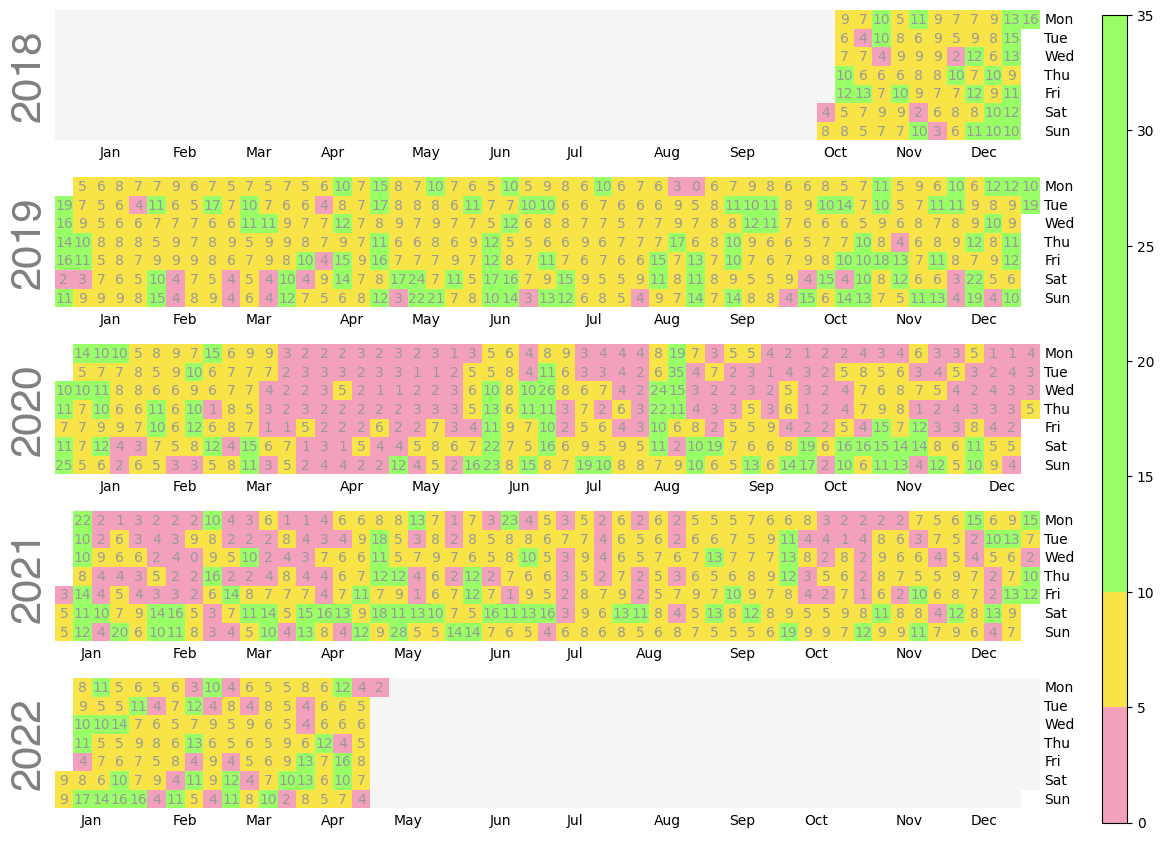

In [92]:
steps_cmap_3 = ListedColormap(['#f3a0bc'] * 5 + ['#f8e447'] * 5 + ['#99ff66'] * 25)

calplot.calplot(steps,
                textformat='{:.0f}',
                textcolor='#999999',
                cmap=steps_cmap_3,
                linewidth=0.0005,
                edgecolor='white'
               )

In [153]:
grouped_steps_df = pd.DataFrame(df.groupby(['year', 'steps_cnt_grouped']).count()['date'])
grouped_steps_df = grouped_steps_df.reset_index()
grouped_steps_df

,year,steps_cnt_grouped,date
0,2018,1,7
1,2018,2,51
2,2018,3,15
3,2019,1,40
4,2019,2,240
5,2019,3,85
6,2020,1,175
7,2020,2,134
8,2020,3,57
9,2021,1,128


In [149]:
grouped_steps_df_better = grouped_steps_df.pivot(index='year', columns='steps_cnt_grouped', values='date').add_prefix('steps_group_').reset_index()
grouped_steps_df_better

steps_cnt_grouped,year,steps_group_1,steps_group_2,steps_group_3
0,2018,7,51,15
1,2019,40,240,85
2,2020,175,134,57
3,2021,128,177,60
4,2022,29,65,21


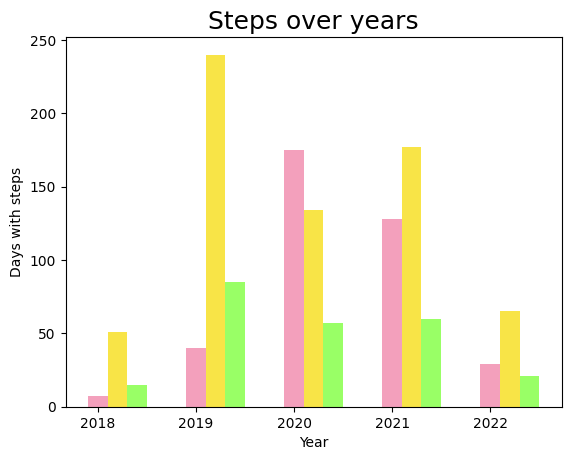

In [148]:
width = 0.2
plt.bar(x=grouped_steps_df_better['year'],
        height=grouped_steps_df_better['steps_group_1'],
        width=width,
        color='#f3a0bc'
       )
plt.bar(x=grouped_steps_df_better['year']+width,
        height=grouped_steps_df_better['steps_group_2'],
        width=width,
        color='#f8e447'
       )
plt.bar(x=grouped_steps_df_better['year']+width*2,
        height=grouped_steps_df_better['steps_group_3'],
        width=width,
        color='#99ff66'
       )
plt.title('Steps over years', fontsize=18)
plt.xlabel('Year')
plt.ylabel('Days with steps')
plt.show()

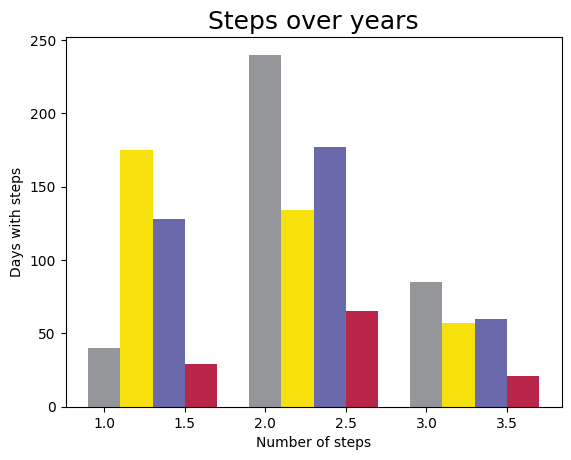

In [152]:
width = 0.2

year_colors = {
    '2019': '#949699',
    '2020': '#f7e10d',
    '2021': '#6969ab',
    '2022': '#ba264a'
    
}

for year_order, year in enumerate(year_colors.keys()):
    for steps_group in range(1, 4):
        plt.bar(x=steps_group+width*year_order,
                height=grouped_steps_df_better[grouped_steps_df_better['year']==int(year)][f'steps_group_{steps_group}'],
                width=width,
                color=year_colors[year]
               )

plt.title('Steps over years', fontsize=18)
plt.xlabel('Number of steps')
plt.ylabel('Days with steps')
plt.show()